In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import util
import mylearn
import time
np.random.seed(1)
data = pd.read_csv('train.csv') #pre-downloaded housing data
House = data.copy()


In [18]:
# preprocessing that Matt suggested

replace_index = np.random.choice(len(House), size = int(len(House)/4), replace = False)
Houseval = House.iloc[replace_index]
Housetrain= House.drop(replace_index)
cats = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch','3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
target = 'SalePrice'
traintarget = Housetrain[target]
valtarget = Houseval[target]
Housetrain = Housetrain[cats]
Houseval = Houseval[cats]
Housetrain['HouseAge']=2010 - Housetrain['YearBuilt']
Houseval['HouseAge'] = 2010 - Houseval['YearBuilt']
Housetrain.drop('YearBuilt', axis =1, inplace = True)
Houseval.drop('YearBuilt', axis = 1, inplace = True)
Housetrain['RemodAge']=2010 - Housetrain['YearRemodAdd']
Houseval['RemodAge'] = 2010 - Houseval['YearRemodAdd']
Housetrain.drop('YearRemodAdd', axis =1, inplace = True)
Houseval.drop('YearRemodAdd', axis = 1, inplace = True)
fillvals = {'LotFrontage': 0, 'MasVnrArea': 0, 'GarageYrBlt': min(Housetrain['GarageYrBlt'])}  #creates fill values
Housetrain.fillna(value = fillvals, inplace = True)
Houseval.fillna(value = fillvals, inplace = True)
Housetrain.isnull().sum().sum()
Houseval.isnull().sum().sum()

0

In [19]:
ytrain = traintarget 
ytest = valtarget 
xtrain = Housetrain 
xtest = Houseval 

In [20]:
# apply linear regression

from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
t0 = time.time()           # start time
clf.fit(xtrain, ytrain)
t1 = time.time()           # ending time
accuracy = clf.score(xtest, ytest)

print(f'Overall accuracy for Linear Regression = {accuracy};')
print(f'The Linear Regression learning process takes {t1 - t0} seconds.')

Overall accuracy for Linear Regression = 0.8153819924647678;
The Linear Regression learning process takes 0.005984067916870117 seconds.


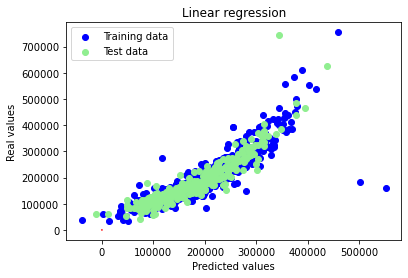

In [21]:
# plot of real values vs predicted ones

import matplotlib.pyplot as plt

y_train_pred = clf.predict(xtrain)
y_test_pred = clf.predict(xtest)

plt.scatter(y_train_pred,ytrain, c = "blue", label = "Training data")
plt.scatter(y_test_pred, ytest, c = "lightgreen", label = "Test data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()


In [22]:
# now regression with normalization
import util

xtrain_normalized, xtest_normalized = util.normalize(xtrain, Te=xtest)

clf = LinearRegression()
t0 = time.time()           # start time
clf.fit(xtrain_normalized, ytrain)
t1 = time.time()           # ending time
accuracy = clf.score(xtest_normalized, ytest)

print(f'Overall accuracy for Linear Regression with normalization = {accuracy};')
print(f'The Linear Regression with normalization learning process takes {t1 - t0} seconds.')

Overall accuracy for Linear Regression with normalization = 0.8153030871639096;
The Linear Regression with normalization learning process takes 0.0029935836791992188 seconds.


In [23]:
# now regression with pca

import mylearn

E = mylearn.pca(xtrain_normalized, 0.15)

xtrain_np = np.dot(xtrain_normalized, E)
xtest_np = np.dot(xtest_normalized, E)


clf = LinearRegression()
t0 = time.time()           # start time
clf.fit(xtrain_np, ytrain)
t1 = time.time()           # ending time
accuracy = clf.score(xtest_np, ytest)

print(f'Overall accuracy for Linear Regression with normalization and pca = {accuracy};')
print(f'The Linear Regression with normalization and pca learning process takes {t1 - t0} seconds.')


Overall accuracy for Linear Regression with normalization and pca = 0.7956282937646244;
The Linear Regression with normalization and pca learning process takes 0.001994609832763672 seconds.
